In [1]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D,MaxPooling2D,Flatten
import matplotlib.pyplot  as plt
import numpy as np
import cv2
%matplotlib inline

In [2]:
from keras.datasets import mnist
(train_X, train_y), (test_X, test_y) = mnist.load_data()

In [3]:
train_images=train_X
train_labels=train_y
test_images=test_X
test_labels=test_y

In [4]:
train_images.shape

(60000, 28, 28)

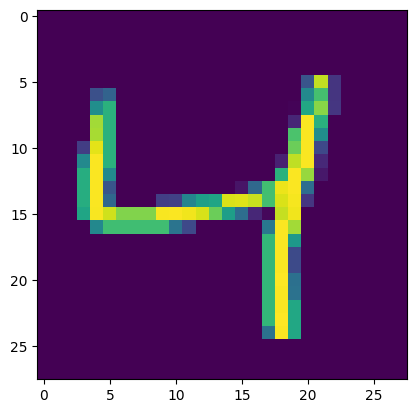

4


In [5]:
plt.close()

plt.imshow(train_images[2])

plt.show()

print(train_labels[2])

In [6]:
train_images=train_images/255
test_images=test_images/255

In [7]:
train_images[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [8]:
train_images=np.expand_dims(train_images,axis=3)
test_images=np.expand_dims(test_images,axis=3)

In [9]:
train_images.shape

(60000, 28, 28, 1)

In [10]:
model=Sequential()

model.add(Conv2D(filters=8, kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dense(10))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 8)         80        
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 8)         0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 1352)              0         
                                                                 
 dense (Dense)               (None, 32)                43296     
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                                 
Total params: 43706 (170.73 KB)
Trainable params: 43706 (170.73 KB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [12]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [13]:
model.fit(train_images, train_labels, epochs=10, validation_data=(test_images,test_labels))

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2489 - accuracy: 0.9282 - val_loss: 0.1034 - val_accuracy: 0.9675
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0920 - accuracy: 0.9721 - val_loss: 0.0761 - val_accuracy: 0.9744
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0679 - accuracy: 0.9797 - val_loss: 0.0646 - val_accuracy: 0.9785
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0556 - accuracy: 0.9826 - val_loss: 0.0645 - val_accuracy: 0.9789
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0464 - accuracy: 0.9860 - val_loss: 0.0537 - val_accuracy: 0.9817
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0383 - accuracy: 0.9878 - val_loss: 0.0502 - val_accuracy: 0.9837
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0340 - accuracy: 0.9891 - val_loss: 0.0543 - val_ac

In [14]:
model.save('ocr.h5')

C:\Users\azi\AppData\Roaming\Python\Python38\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [15]:
out=model.predict(test_images)

313/313 [==============================] - 1s 3ms/step


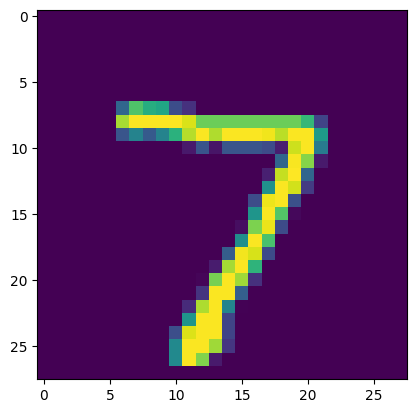

7


In [16]:
plt.close()

plt.imshow(test_images[0])

plt.show()

print(test_labels[0])

In [17]:
out[0]

array([-11.5692    ,  -2.6969793 ,   0.33014774,  -2.3348975 ,
       -10.031388  , -11.536499  , -22.758202  ,  17.755972  ,
        -4.8508444 ,  -1.9323182 ], dtype=float32)

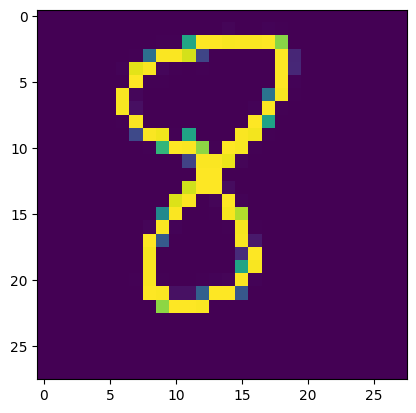

1/1 [==============================] - 0s 21ms/step
6


In [18]:


img=cv2.imread('8.jpg')
img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.resize(img,(28,28))


img= cv2.bitwise_not(img)



img = img/255





plt.close()

plt.imshow(img)

plt.show()

img= np.array([img])


img=np.expand_dims(img, axis=3)


out2= model.predict(img)

m=-1000
o2=out2[0]
ind=-1

for i in range(len(o2)):
    if o2[i]>m:
        m=o2[i]
        ind=i


print(ind)